Build a model based on the data you have scraped. Don't worry if the model is far from perfect. You can always improve later. The most important thing is your story, you can answer the following questions after you finish modeling.

In [1]:
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
df_app = pd.read_csv('application_record.csv')
df_cred = pd.read_csv('credit_record.csv')

* Two files are included in this project. df_app is all the application records of the clients, while df_cred is the credit record.

# Pre-Model Analysis

## Analysis of the application record

In [3]:
df_app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
df_app.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
df_app.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [7]:
df_app.rename(columns={'CODE_GENDER':'Gender','FLAG_OWN_CAR':'Car','FLAG_OWN_REALTY':'Realty',
                         'CNT_CHILDREN':'ChildNo','AMT_INCOME_TOTAL':'income',
                         'NAME_EDUCATION_TYPE':'edutp','NAME_FAMILY_STATUS':'famtp',
                        'NAME_HOUSING_TYPE':'housetp','FLAG_EMAIL':'email',
                         'NAME_INCOME_TYPE':'incometp','FLAG_WORK_PHONE':'wkphone',
                         'FLAG_PHONE':'phone','CNT_FAM_MEMBERS':'famsize',
                        'OCCUPATION_TYPE':'occtp'
                        },inplace=True)

* 17 features in total for the application record.
    * Binary features: 6 (gender, own car or not, own realty or not, having work phone or not, having phone or not, and having email or not)
    * Continuous features: 5 (# of children, income, days of birth, days of employed, and # of family members)
    * Categotical features: 5 (income type, education type, family status, housing type, and occupation type)
    * Constant feature: 1 (having a mobile of not)

In [8]:
# We can drop the constant feature - having mobile or not
df_app.drop('FLAG_MOBIL', axis=1, inplace=True)

## Analysis of the credit record

In [9]:
df_cred.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [10]:
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
df_cred.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [12]:
df_cred.nunique()

ID                45985
MONTHS_BALANCE       61
STATUS                8
dtype: int64

* There are only 45985 unique ID numbers, but there are 1048575 rows, which means that there are multiple records for different ID numbers.

# Problem Definition

* Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. 

# Feature Engineering

## Binary Features

* Binary features: 6 (gender, own car or not, own realty or not, having work phone or not, having phone or not, and having email or not)

In [13]:
# Transform gender information to 0 & 1
df_app['Gender'].replace({'M': 1, 'F': 0}, inplace=True)

In [14]:
# Transform car information to 0 & 1
df_app['Car'].replace({'Y': 1, 'N': 0}, inplace=True)

In [15]:
# Transform realty information to 0 & 1
df_app['Realty'].replace({'Y': 1, 'N': 0}, inplace=True)

In [63]:
# Workphone, phone, and email information are already coded with 1 & 0

In [16]:
df_app.head()

,ID,Gender,Car,Realty,ChildNo,income,incometp,edutp,famtp,housetp,DAYS_BIRTH,DAYS_EMPLOYED,wkphone,phone,email,occtp,famsize
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
1,5008805,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0
2,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
4,5008809,0,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0


## Continuous Features

* Continuous features: 5 (# of children, income, days of birth, days of employed, and # of family members)

### Colinearity

In [17]:
import seaborn as sns

<AxesSubplot:>

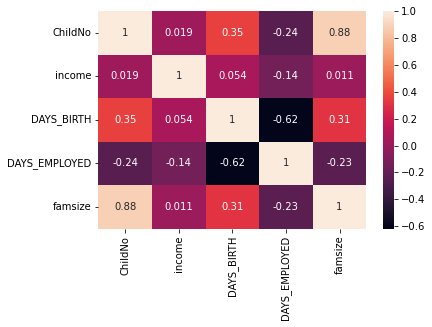

In [21]:
sns.heatmap(df_app[['ChildNo', 'income','DAYS_BIRTH', 'DAYS_EMPLOYED', 'famsize']].corr(method='pearson'), annot=True)

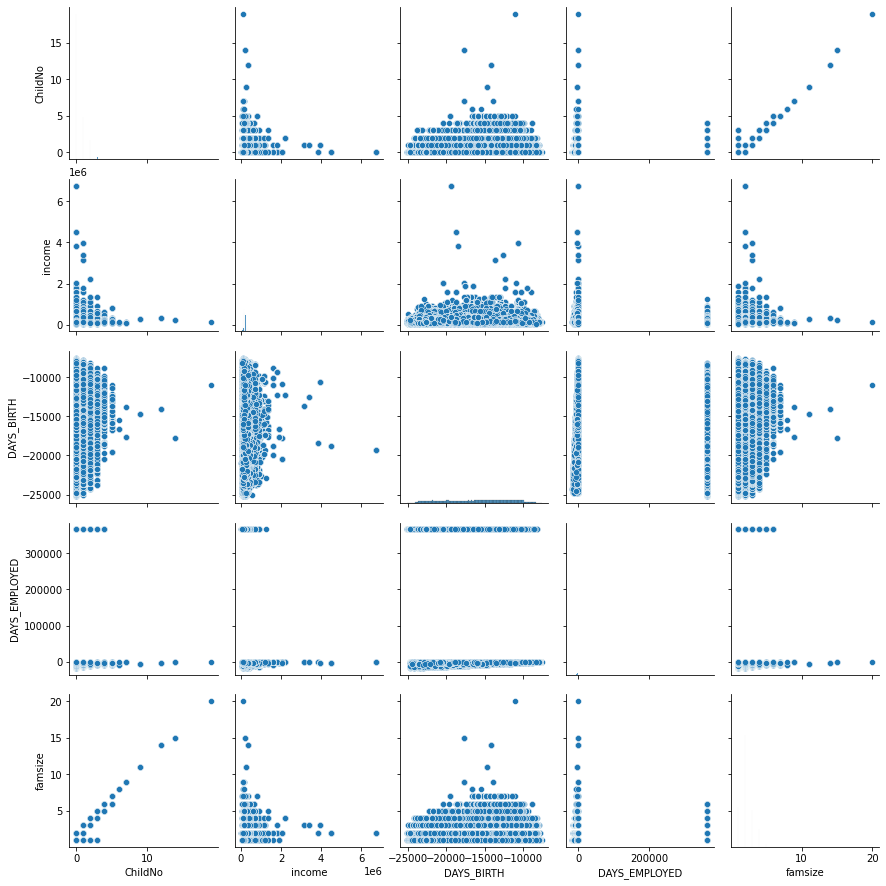

In [22]:
sns.pairplot(df_app[['ChildNo', 'income','DAYS_BIRTH', 'DAYS_EMPLOYED', 'famsize']])

* We can tell that famility size and number of children are highly correlated. We can drop one of them, for example, famility size, and check again.

<AxesSubplot:>

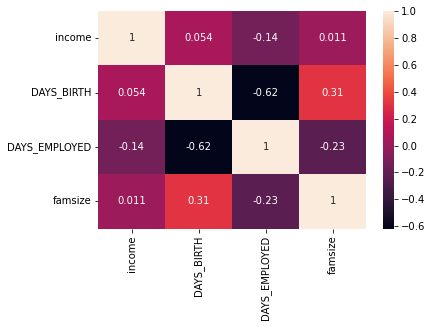

In [23]:
sns.heatmap(df_app[['income','DAYS_BIRTH', 'DAYS_EMPLOYED', 'famsize']].corr(method='pearson'), annot=True)

## Categorical Features

* Categotical features: 5 (income type, education type, family status, housing type, and occupation type)
* Since we don't have too many features. We can use One Hot encoding for the categorical features.

In [24]:
# There are lots of missing values in occupation type. We can fill the NaN with "Others"

df_app['occtp'].fillna('Others', inplace=True)

In [81]:
# Use One Hot encoder to transform all the categorical features

CatFeatures = ['incometp', 'edutp', 'famtp', 'housetp', 'occtp']
for x in CatFeatures:
    if df_app[x].dtypes == 'object':
        df_app = df_app.join(df_app[x].str.get_dummies())

In [88]:
df_app = df_app.drop(CatFeatures, axis=1)

In [89]:
df_app.columns

Index(['ID', 'Gender', 'Car', 'Realty', 'ChildNo', 'income', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'wkphone', 'phone', 'email', 'famsize',
       'Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'Academic degree', 'Higher education', 'Incomplete higher',
       'Lower secondary', 'Secondary / secondary special', 'Civil marriage',
       'Married', 'Separated', 'Single / not married', 'Widow',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Others', 'Private service staff',
       'Realty agents', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff'],
      dtype='object')

## Target

In [101]:
# Check how many IDs are in both documents
len(set(df_app['ID']).intersection(set(df_cred['ID'])))

36457

In [102]:
df_cred.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1


0: 1-29 days past due

1: 30-59 days past due

2: 60-89 days overdue

3: 90-119 days overdue

4: 120-149 days overdue

5: Overdue or bad debts, paid-offs for more than 150 days

C: paid off that month

X: No loan for the month


* Generally, we belive that customenrs with overdue of more than 60 days are classified as "bad" ones, which will be marked as 1, and others (potential good customers) will be marked as "0".

In [178]:
df_cred = pd.read_csv('credit_record.csv')

In [179]:
df_cred['label'] = None
df_cred.loc[df_cred.STATUS=='2', ['label']] = 1
df_cred.loc[df_cred.STATUS=='3', ['label']] = 1
df_cred.loc[df_cred.STATUS=='4', ['label']] = 1
df_cred.loc[df_cred.STATUS=='5', ['label']] = 1
df_cred.loc[df_cred.STATUS=='X', ['label']] = 0
df_cred.loc[df_cred.STATUS=='C', ['label']] = 0
df_cred.loc[df_cred.STATUS=='0', ['label']] = 0

In [180]:
df_cred_new = df_cred.groupby('ID').max()
df_cred_new['ID'] = df_cred_new.index
df_cred_new.loc[df_cred_new.label >0, ['label']] = 1
df_cred_new.loc[df_cred_new.label ==0, ['label']] = 0
df_cred_new['window'] = df_cred.groupby('ID').MONTHS_BALANCE.max() - df_cred.groupby('ID').MONTHS_BALANCE.min()
df_cred_new.reset_index(drop=True, inplace=True)

In [181]:
df_cred_new

,MONTHS_BALANCE,STATUS,label,ID,window
0,0,X,0.0,5001711,3
1,0,C,0.0,5001712,18
2,0,X,0.0,5001713,21
3,0,X,0.0,5001714,14
4,0,X,0.0,5001715,59
...,...,...,...,...,...
45980,-11,C,0.0,5150482,17
45981,0,X,0.0,5150483,17
45982,0,C,0.0,5150484,12
45983,0,0,0.0,5150485,1


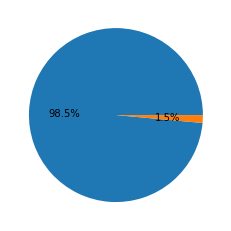

In [182]:
plt.pie(df_cred_new['label'].value_counts(), autopct='%1.1f%%')
plt.show()

* There is an imbalanced problem here. Most of the customers are actually 'good' customers (marked as '0').

In [183]:
# Join two documents that have the same IDs

df = df_app.join(df_cred_new.set_index('ID'), on = 'ID', how = 'inner')

In [186]:
df

,ID,Gender,Car,Realty,ChildNo,income,DAYS_BIRTH,DAYS_EMPLOYED,wkphone,phone,...,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,MONTHS_BALANCE,STATUS,label,window
0,5008804,1,1,1,0,427500.0,-12005,-4542,1,0,...,0,0,0,0,0,0,0,X,0.0,15
1,5008805,1,1,1,0,427500.0,-12005,-4542,1,0,...,0,0,0,0,0,0,0,X,0.0,14
2,5008806,1,1,1,0,112500.0,-21474,-1134,0,0,...,0,0,0,0,1,0,0,X,0.0,29
3,5008808,0,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,0,0,X,0.0,4
4,5008809,0,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,0,-22,X,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,1,1,1,0,315000.0,-17348,-2420,0,0,...,0,0,0,0,0,0,0,X,1.0,11
434809,5149834,0,0,1,0,157500.0,-12387,-1325,0,1,...,0,0,0,0,0,0,0,C,1.0,23
434810,5149838,0,0,1,0,157500.0,-12387,-1325,0,1,...,0,0,0,0,0,0,0,C,1.0,32
434811,5150049,0,0,1,0,283500.0,-17958,-655,0,0,...,0,0,1,0,0,0,0,2,1.0,9


# Modeling

* If someone has an account history of less than 3 months, we don't think we have enough data to determine if he or she is a good customer or not
* Our model will be mainly based on the customers that have an account history of more than 3 months

In [190]:
df = df[df.window >= 3]

In [191]:
df

,ID,Gender,Car,Realty,ChildNo,income,DAYS_BIRTH,DAYS_EMPLOYED,wkphone,phone,...,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,MONTHS_BALANCE,STATUS,label,window
0,5008804,1,1,1,0,427500.0,-12005,-4542,1,0,...,0,0,0,0,0,0,0,X,0.0,15
1,5008805,1,1,1,0,427500.0,-12005,-4542,1,0,...,0,0,0,0,0,0,0,X,0.0,14
2,5008806,1,1,1,0,112500.0,-21474,-1134,0,0,...,0,0,0,0,1,0,0,X,0.0,29
3,5008808,0,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,0,0,X,0.0,4
4,5008809,0,0,1,0,270000.0,-19110,-3051,0,1,...,0,0,1,0,0,0,-22,X,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434808,5149828,1,1,1,0,315000.0,-17348,-2420,0,0,...,0,0,0,0,0,0,0,X,1.0,11
434809,5149834,0,0,1,0,157500.0,-12387,-1325,0,1,...,0,0,0,0,0,0,0,C,1.0,23
434810,5149838,0,0,1,0,157500.0,-12387,-1325,0,1,...,0,0,0,0,0,0,0,C,1.0,32
434811,5150049,0,0,1,0,283500.0,-17958,-655,0,0,...,0,0,1,0,0,0,0,2,1.0,9


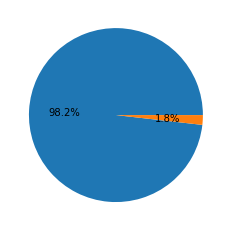

In [228]:
plt.pie(df['label'].value_counts(), autopct='%1.1f%%')
plt.show()

In [192]:
features = list(df.columns)
target = 'label'
features.remove(target)
features.remove('ID')
features.remove('MONTHS_BALANCE')
features.remove('STATUS')
features.remove('window')

In [199]:
X = df[features]
Y = df[target]

* We will use SMOTE (Synthetic Minority Over-sampling TEchnique) and imblance Pipleline to address imbalanced data issue

In [220]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

## Logistic Regression as Base Model

In [221]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [222]:
steps_LR = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('lr', LogisticRegression(max_iter = 10000))]
lr = Pipeline(steps_LR)
lr = lr.fit(X_train, y_train)

In [223]:
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

In [224]:
#Trainting set classification report
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     23462
         1.0       0.08      0.05      0.06       426

    accuracy                           0.97     23888
   macro avg       0.53      0.52      0.52     23888
weighted avg       0.97      0.97      0.97     23888



In [225]:
#Testing set classification report
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10050
         1.0       0.04      0.03      0.03       189

    accuracy                           0.97     10239
   macro avg       0.51      0.51      0.51     10239
weighted avg       0.96      0.97      0.97     10239



In [226]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(lr, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.547


In [210]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

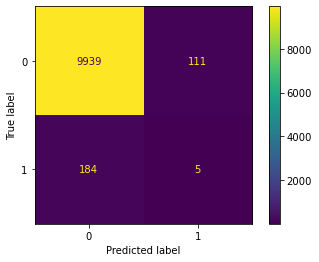

In [227]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_lr)).plot()

## Decision Tree

In [229]:
from sklearn.tree import DecisionTreeClassifier

In [230]:
steps_dt = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('dt', DecisionTreeClassifier())]
dt = Pipeline(steps_dt)
dt = dt.fit(X_train, y_train)

In [231]:
y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

In [242]:
#Trainting set classification report
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23462
         1.0       0.70      0.69      0.70       426

    accuracy                           0.99     23888
   macro avg       0.85      0.84      0.84     23888
weighted avg       0.99      0.99      0.99     23888



In [243]:
#Testing set classification report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10050
         1.0       0.29      0.29      0.29       189

    accuracy                           0.97     10239
   macro avg       0.64      0.64      0.64     10239
weighted avg       0.97      0.97      0.97     10239



In [235]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(dt, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.730


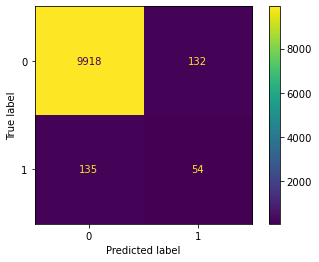

In [234]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_dt)).plot()

## Random Forest

In [239]:
from sklearn.ensemble import RandomForestClassifier

In [240]:
steps_rf = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('rf', RandomForestClassifier())]

rf = Pipeline(steps_rf)
rf = rf.fit(X_train, y_train)

In [241]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [244]:
#Trainting set classification report
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23462
         1.0       0.69      0.71      0.70       426

    accuracy                           0.99     23888
   macro avg       0.84      0.85      0.85     23888
weighted avg       0.99      0.99      0.99     23888



In [245]:
#Testing set classification report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10050
         1.0       0.31      0.24      0.27       189

    accuracy                           0.98     10239
   macro avg       0.65      0.61      0.63     10239
weighted avg       0.97      0.98      0.97     10239



In [249]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(rf, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.808


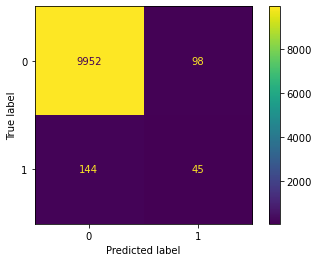

In [246]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_rf)).plot()

## SVM

In [305]:
from sklearn.svm import LinearSVC

In [307]:
steps_svm = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('svm', LinearSVC(max_iter = 10000))]

svm = Pipeline(steps_svm)
svm = svm.fit(X_train, y_train)

In [308]:
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

In [309]:
#Trainting set classification report
print(classification_report(y_train, y_train_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     23462
         1.0       0.46      0.03      0.06       426

    accuracy                           0.98     23888
   macro avg       0.72      0.51      0.52     23888
weighted avg       0.97      0.98      0.97     23888



In [310]:
#Testing set classification report
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     10050
         1.0       0.46      0.03      0.06       189

    accuracy                           0.98     10239
   macro avg       0.72      0.52      0.53     10239
weighted avg       0.97      0.98      0.97     10239



In [312]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(svm, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.543


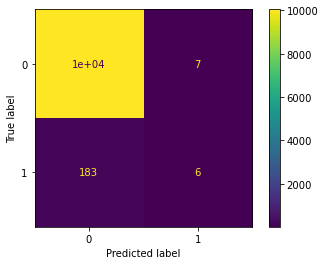

In [311]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_svm)).plot()

## XGBoost

In [313]:
from xgboost import XGBClassifier

In [314]:
steps_xgb = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('xgb', XGBClassifier(n_jobs=-1))]

xgb = Pipeline(steps_xgb)
xgb = xgb.fit(X_train, y_train)

In [315]:
y_train_pred_xgb = xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

In [316]:
#Trainting set classification report
print(classification_report(y_train, y_train_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23462
         1.0       0.53      0.49      0.51       426

    accuracy                           0.98     23888
   macro avg       0.76      0.74      0.75     23888
weighted avg       0.98      0.98      0.98     23888



In [317]:
#Testing set classification report
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     10050
         1.0       0.24      0.19      0.21       189

    accuracy                           0.97     10239
   macro avg       0.61      0.59      0.60     10239
weighted avg       0.97      0.97      0.97     10239



In [319]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(xgb, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.737


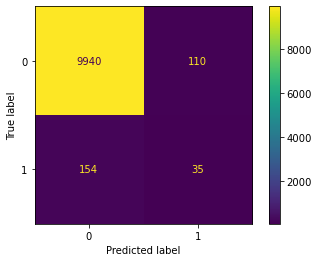

In [318]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_xgb)).plot()

# Model Optimization

* Based on the cross validation score of ROC_AUC, we pick Random Forest and XGBoost as good candidates

## Tuning Random Forest

In [326]:
from sklearn.metrics import make_scorer, precision_score

In [332]:
steps_rf = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('rf', RandomForestClassifier())]
params = {'rf__min_samples_leaf': np.arange(5, 30), # 5
         'rf__max_depth': np.arange(2, 10),  
        }
scorer = make_scorer(precision_score)
rf_gcv = GridSearchCV(estimator=Pipeline(steps_rf), param_grid = params, scoring = scorer, n_jobs = -1, cv = 3).fit(X_train, y_train)

In [333]:
print('Tunning results: ', rf_gcv.best_params_)

Tunning results:  {'rf__max_depth': 9, 'rf__min_samples_leaf': 13}


In [342]:
#Test the tuned parameters

steps_rf = [('smt', SMOTE()), ('rescale', MinMaxScaler()), ('rf', RandomForestClassifier(max_depth = 9, min_samples_leaf = 13))]
rf = Pipeline(steps_rf)
rf = rf.fit(X_train, y_train)

In [343]:
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
print('Classification metrics of Train data: \n', classification_report(y_train, y_train_pred_rf))
print('Classification metrics of Test data: \n', classification_report(y_test, y_test_pred_rf))

Classification metrics of Train data: 
               precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     23462
         1.0       0.20      0.37      0.26       426

    accuracy                           0.96     23888
   macro avg       0.59      0.67      0.62     23888
weighted avg       0.97      0.96      0.97     23888

Classification metrics of Test data: 
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     10050
         1.0       0.08      0.13      0.10       189

    accuracy                           0.96     10239
   macro avg       0.53      0.55      0.54     10239
weighted avg       0.97      0.96      0.96     10239



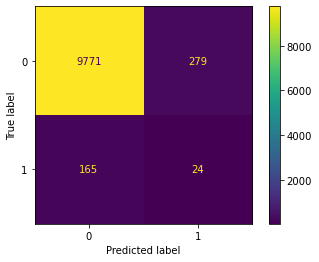

In [344]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_rf)).plot()

## Tuning XGBoost

In [341]:
steps = [('over', SMOTE()), 
         ('scaler', MinMaxScaler()),
         ('model', XGBClassifier(objective='binary:logistic', 
                                 learning_rate=0.5, max_depth=8,
                                 n_estimators=250, min_child_weight=4))]
param = {#'model__learning_rate': [0.005, 0.05, 0.1, 0.5, 1],  # 0.5
         #'model__gamma': [0, 0.5, 1, 1.5, 2],  # 0
         #'model__max_depth': np.arange(3, 10),  # 8
         #'model__n_estimators': [100, 200, 250, 300, 400], # 250
         #'model__lambda': [1, 1.5, 2],
         #'model__subsample': [1, 0.8],
         'model__min_child_weight': np.arange(1, 10)  # 4
        }

scorer = make_scorer(precision_score)
model_tuned = GridSearchCV(
    estimator=Pipeline(steps),
    param_grid=param,
    scoring=scorer,
    n_jobs = -1,
    cv=3).fit(X_train, y_train)

In [345]:
y_train_pred = model_tuned.best_estimator_.predict(X_train)
y_test_pred = model_tuned.best_estimator_.predict(X_test)

print('Classification metrics of Train data: \n', classification_report(y_train, y_train_pred))
print('Classification metrics of Test data: \n', classification_report(y_test, y_test_pred))

Classification metrics of Train data: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     23462
         1.0       0.70      0.70      0.70       426

    accuracy                           0.99     23888
   macro avg       0.84      0.85      0.85     23888
weighted avg       0.99      0.99      0.99     23888

Classification metrics of Test data: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10050
         1.0       0.36      0.29      0.32       189

    accuracy                           0.98     10239
   macro avg       0.68      0.64      0.66     10239
weighted avg       0.98      0.98      0.98     10239



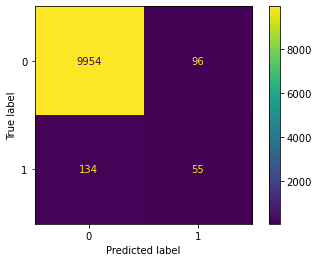

In [346]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

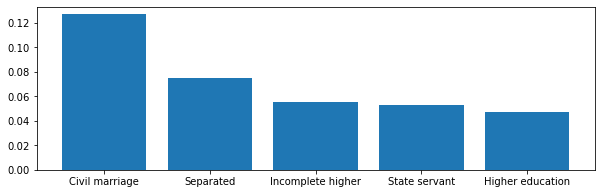

In [356]:
importances = model_tuned.best_estimator_[2].feature_importances_
importances_dict = {}
for i,v in enumerate(importances):
    importances_dict [i] = v
important_features_list = sorted(importances_dict,
                                 key=importances_dict.get,
                                 reverse=True)
top_features = []
top_importances = []
for i in range(0,5):
    top_features.append(features[important_features_list[i]])
    top_importances.append(importances[important_features_list[i]])
    
plt.figure(figsize = (10, 3))
plt.bar(top_features, top_importances)
plt.show()

# Conclusion

* It seems that XGBoost is the best model based on the metrics.
* Let's take a further look at the business value of this optimized model.

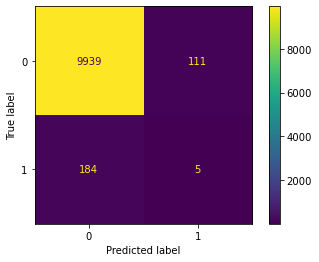

In [348]:
# Let's revisit the confusion matrix of the base model - logistic regression
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_lr)).plot()

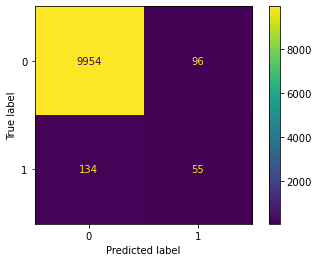

In [349]:
# And the confusion matrix of the optimized model - XGBoost
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot()

* **Assuming that our customers (banks and financing companies) earn 'ave_earn' from each good clients (labeled as 0 in this model), and lose 'ave_loss' from each "bad" clients due to bad debt.**
* **Logistic regression predicted 9939 good clients which are supposed to be good, and 5 "bad" clients which are supposed to be "bad".**
* **XGBoost predicted 9954 good clients which are supposed to be good, and 55 "bad" clients which are supposed to be "bad".**
* **XGBoost helps our customers to get 15 more good clients, and avoid 50 more "bad" clients**
* **This corresponds to a total earning of 15 * ave_earn + 50 * ave_loss**
* **Once we get the estimated values of ave_earn and ave_loss, we can quantify the business values of this model**
* **And the feature importances suggest that the marrige status and education are important factors to consider in the evaluation of credit card approval.**